# The Schedule Plot for SMD Simulations of T4L

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from matplotlib.collections import LineCollection

In [50]:
def generate_force_profile(S_phases, F_values):
    # time = []
    force = []
    # color = []
    current_time = 0

    time=[0.0]
    for phase in S_phases:
        time.append(current_time+phase)
        current_time+=phase
    force=[0.0,F_values,F_values,0.0,0.0]
    
    return time, force #, color

In [51]:
# Expanding the data to represent the entire table for better simulation
data = {
    "Set Name": [
        "1", "2", "12", "12χ", "126χ", "186", "129χ", "129-10χ", 
        "126χ-(F1)", "126χ-(F2)", "126χ-(S1)", "126χ-(S2)", "126χ-(S3)", 
        "6-12χ", "126α3χ-(a)", "126α3χ-(b)", "126α3χ-(c)", "126α3χ-(d)"
    ],
    "CVs steered": [
        ["d1"], ["d2"], ["d1", "d2"], ["d1", "d2", "χ1"], ["d1", "d2", "d6", "χ1"],
        ["d1", "d8", "d6"], ["d1", "d2", "d9", "χ1"], ["d1", "d2", "d9", "d10", "χ1"],
        ["d1", "d2", "d6", "χ1"], ["d1", "d2", "d6", "χ1"], ["d1", "d2", "d6", "χ1"],
        ["d1", "d2", "d6", "χ1"], ["d1", "d2", "d6", "χ1"], ["d1", "d2", "d6", "χ1"],
        ["d1", "d2", "d6", "comα3", "χ1"], ["d1", "d2", "d6", "comα3", "χ1"],
        ["d1", "d2", "d6", "comα3", "χ1"], ["d1", "d2", "d6", "comα3", "χ1"]
    ],
    "S": [
        "25-25-25-25", "25-25-25-25", "25-25-25-25", "25-25-25-25", "25-25-25-25",
        "25-25-25-25", "25-25-25-25", "25-25-25-25", "25-25-25-25", "25-25-25-25",
        "5-65-5-25", "5-75-5-15", "5-90-5-25", "scheduled", "5-25-5-25", "5-65-5-25",
        "5-25-25-25", "25-25-25-25"
    ],
    "F": [
        ["500"], ["500"], ["500", "500"], ["500", "500", "1000"], ["500", "500", "500", "1000"],
        ["500", "500", "500"], ["500", "500", "500", "1000"], ["500", "500", "500", "500", "1000"],
        ["200", "100", "50", "1000"], ["20", "10", "5", "1000"], ["500", "500", "500", "1000"],
        ["500", "500", "500", "1000"], ["500", "500", "500", "1000"], ["500", "500", "500", "1000"],
        ["500", "500", "500", "500", "1000"], ["500", "500", "500", "500", "1000"],
        ["500", "500", "500", "500", "1000"], ["500", "500", "500", "500", "1000"]
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure S_phases has "scheduled" values handled appropriately by marking those rows differently
def process_s_phases(s):
    if s == "scheduled":
        return None  # Mark scheduled differently for conditional plotting
    else:
        return list(map(int, s.split('-')))

df['S_phases'] = df['S'].apply(process_s_phases)

In [70]:
# Function to classify unique profile types based on S_phases pattern
def classify_profile_type(s_phases):
    if s_phases is None:
        return "Scheduled"
    elif len(set(s_phases)) == 1:
        return "I"  # All segments have the same duration
    elif s_phases == [5, 65, 5, 25]:
        return "II"  # Specific unique pattern
    elif s_phases == [5, 75, 5, 15]:
        return "III"  # Specific unique pattern
    elif s_phases == [5, 90, 5, 25]:
        return "IV"  # Specific unique pattern
    elif s_phases == [5, 25, 5, 25]:
        return "V"  # Specific unique pattern
    elif s_phases == [5, 25, 25, 25]:
        return "VI"  # Specific unique pattern
    else:
        return "VII"  # Default for any other unique pattern

# Convert lists in 'S_phases' to strings for uniqueness identification
df['S_phases_str'] = df['S_phases'].apply(lambda x: str(x) if x is not None else "Scheduled")
df['F_str'] = df['F'].apply(lambda x: str(x))
df['Profile Type'] = df['S_phases'].apply(classify_profile_type)
print(df[['Set Name','Profile Type']].to_latex())


\begin{tabular}{lll}
\toprule
 & Set Name & Profile Type \\
\midrule
0 & 1 & I \\
1 & 2 & I \\
2 & 12 & I \\
3 & 12χ & I \\
4 & 126χ & I \\
5 & 186 & I \\
6 & 129χ & I \\
7 & 129-10χ & I \\
8 & 126χ-(F1) & I \\
9 & 126χ-(F2) & I \\
10 & 126χ-(S1) & II \\
11 & 126χ-(S2) & III \\
12 & 126χ-(S3) & IV \\
13 & 6-12χ & Scheduled \\
14 & 126α3χ-(a) & V \\
15 & 126α3χ-(b) & II \\
16 & 126α3χ-(c) & VI \\
17 & 126α3χ-(d) & I \\
\bottomrule
\end{tabular}



In [ ]:

unique_profiles = df[['Profile Type', 'S_phases', 'F', 'S_phases_str', 'F_str']].drop_duplicates(subset=['Profile Type', 'S_phases_str', 'F_str']).reset_index(drop=True)

print(unique_profiles.to_latex())


In [53]:

# Display unique profile types and example S_phases for each
unique_profile_types = df[['Profile Type', 'S_phases_str']].drop_duplicates().reset_index(drop=True)
unique_profile_types


,Profile Type,S_phases_str
0,I,"[25, 25, 25, 25]"
1,II,"[5, 65, 5, 25]"
2,III,"[5, 75, 5, 15]"
3,IV,"[5, 90, 5, 25]"
4,Scheduled,Scheduled
5,V,"[5, 25, 5, 25]"
6,VI,"[5, 25, 25, 25]"


In [54]:
# Filter out the "Scheduled" type and prepare an example plot for each remaining unique profile type
example_profiles = unique_profiles[unique_profiles['Profile Type'] != 'Scheduled'].reset_index(drop=True)
# Select only one example per unique profile type for a clean legend
unique_example_profiles = example_profiles.drop_duplicates(subset=['Profile Type']).reset_index(drop=True)
reversed_profiles = unique_example_profiles[::-1].reset_index(drop=True)

In [55]:
def colored_line_between_pts(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified between (x, y) points by a third value.

    It does this by creating a collection of line segments between each pair of
    neighboring points. The color of each segment is determined by the
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should have a size one less than that of x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Check color array size (LineCollection still works, but values are unused)
    if len(c) != len(x) - 1:
        warnings.warn(
            "The c argument should have a length one less than the length of x and y. "
            "If it has the same length, use the colored_line function instead."
        )

    # Create a set of line segments so that we can color them individually
    # This creates the points as an N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, **lc_kwargs)

    # Set the values used for colormapping
    lc.set_array(c)

    return ax.add_collection(lc)

C:\Users\cfa22\AppData\Local\Temp\ipykernel_28528\1233456643.py:34: UserWarning: The c argument should have a length one less than the length of x and y. If it has the same length, use the colored_line function instead.
  warnings.warn(


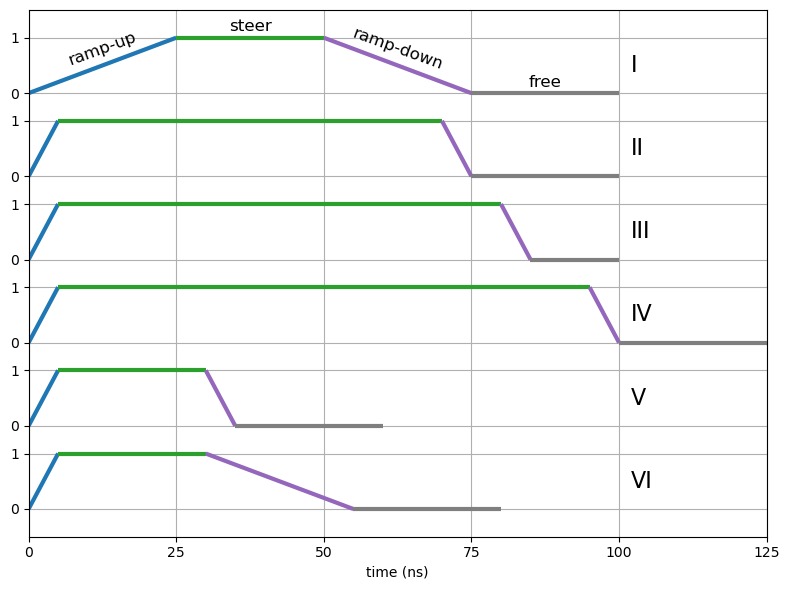

In [85]:
# Final adjustments: make each curve black and remove the title

fig, ax = plt.subplots(figsize=(8, 6))
offset = 0  # Initial offset for the first curve
spacing = 1.5  # Maintain the increased spacing
yticks = []  # Collect y-tick positions
yticklabels = []  # Collect y-tick labels

# Loop through each profile type in reversed order and plot with offsets
for i, (profile_type, s_phases) in enumerate(reversed_profiles[['Profile Type', 'S_phases']].values):
    if s_phases is not None:
        # Generate time and force profile
        time, force = generate_force_profile(s_phases, 1)
        line=colored_line_between_pts(time,np.array(force) + offset, ax=ax, c=[.1,.2,.3,.4,.5], cmap='tab10',linewidth=3)
        # ax.plot(time, np.array(force) + offset)
        
        # Add direct label at the end of each curve
        ax.text(102, offset + 0.5, profile_type, va='center', ha='left', fontsize=16, color='black')
        
        # Collect the 0 and 1 tick positions and labels for this curve
        yticks.extend([offset, offset + 1])
        yticklabels.extend(["0", "1"])
        
        # Increment offset with increased spacing for the next profile
        offset += spacing

ax.text(12.5,offset-0.7,"ramp-up",va='center',ha='center',rotation=20,fontsize=12,color='black')
ax.text(37.5,offset-0.3,"steer",va='center',ha='center',rotation=0,fontsize=12,color='black')
ax.text(62.5,offset-0.7,"ramp-down",va='center',ha='center',rotation=-20,fontsize=12,color='black')
ax.text(87.5,offset-1.3,"free",va='center',ha='center',rotation=0,fontsize=12,color='black')

# Set custom y-ticks and labels to show only 0 and 1 for each curve
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.set_xticks(np.arange(0,150,25))
ax.set_ylim([-0.5,9])
# Removing title and maintaining grid
ax.set_xlabel("time (ns)")
ax.grid(True)

plt.tight_layout()
plt.savefig('smd_kappa_schedules.png',bbox_inches='tight')
plt.show()
